In [1]:
import json
import numpy as np
import scipy.stats

# load the file
dataset_paths = ["../../datasets/split2_model7/gsm8k-train.json"]
# # file_path = "../../datasets/split2_model7/humaneval_train.json"
dataset_paths = ["../../datasets/split2_model7/mmlu_train.json", "../../datasets/split2_model7/gsm8k-train.json", "../../datasets/split2_model7/cmmlu_train.json","../../datasets/split2_model7/arc_challenge_train.json", "../../datasets/split2_model7/humaneval_train.json"]
training_data = []
for file_path in dataset_paths:
    with open(file_path, 'r') as f:
        data_list = json.load(f)
        training_data.extend(data_list)
        
print(len(training_data))

uniform_distribution = np.ones([7]) / 7
print(uniform_distribution)
soft_max_score_list = []
KL_divergences = []
KL_originals = []
top_2_distance = []
top_3_distance = []
bottom_1_distance = []
for data_item in training_data:
    np_score = np.array(list(data_item['scores'].values()))
    np_max = np.max(np_score)
    np_distance = np_max - np_score
    sort_distance = np.sort(np_distance)
    top_2_distance.append(sort_distance[1])
    top_3_distance.append(sort_distance[2])
    bottom_1_distance.append(sort_distance[-1])

top_2_distance = np.array(top_2_distance)

19871
[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]


64.21921392984751


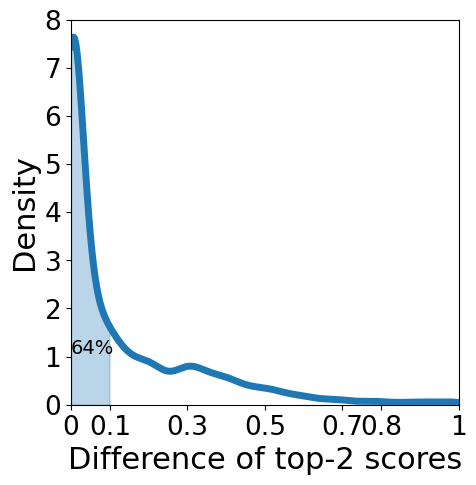

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
# distance = [top_2_distance, top_3_distance, bottom_1_distance]

plt.figure(figsize=(5,5))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# plt.hist(top_2_distance, bins=15, edgecolor='black', label="Top-1 Difference")   
# sns.kdeplot(top_2_distance)
kde = gaussian_kde(top_2_distance)

# Define the range of values to evaluate the KDE
x_values = np.linspace(min(top_2_distance), max(top_2_distance), 1000)

# Evaluate the KDE at the defined points
kde_values = kde(x_values)

plt.plot(x_values, kde_values, linewidth=5)

x_highlight = x_values[x_values < 0.1]
y_highlight = kde_values[:len(x_highlight)] 
percent = np.sum(top_2_distance < 0.1) / len(top_2_distance) * 100
print(percent)
plt.fill_between(x_highlight, y_highlight, color=[0.12156862745098039, 0.4666666666666667, 0.7058823529411765], alpha=0.3)


highlight_x_pos = 0.055  # Center of the highlighted area
highlight_y_pos = max(y_highlight) * 0.1  # A bit above the curve
plt.annotate(f"{percent:.0f}%", (highlight_x_pos, highlight_y_pos), textcoords="offset points", xytext=(0,10), ha='center', color='black', fontsize=14)


plt.xticks([0, 0.1, 0.3, 0.5 , 0.7, 0.8, 1], [0, 0.1, 0.3, 0.5 , 0.7, 0.8, 1])
plt.ylim([0,8])
# plt.yticks([1,2,3,4,5,6,7,8])

plt.xlabel(r'Difference of top-2 scores', fontsize=22)
plt.ylabel('Density', fontsize=22)
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.xlim(0,1)
# # plt.legend(prop={'size': 20})
# # plt.title('Distribution Plot w.r.t. Wasserstein(normalized_score, unifrom)')
# # plt.title('Distribution w.r.t. KL(normalized_score, unifrom)')
save_path = "/data/home/chensh/projects/LLM_router/figures/Difference_distribution.pdf"
plt.savefig(save_path, dpi=800, bbox_inches = 'tight')

In [3]:
import seaborn as sns

default_palette = sns.color_palette()
print(default_palette)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]


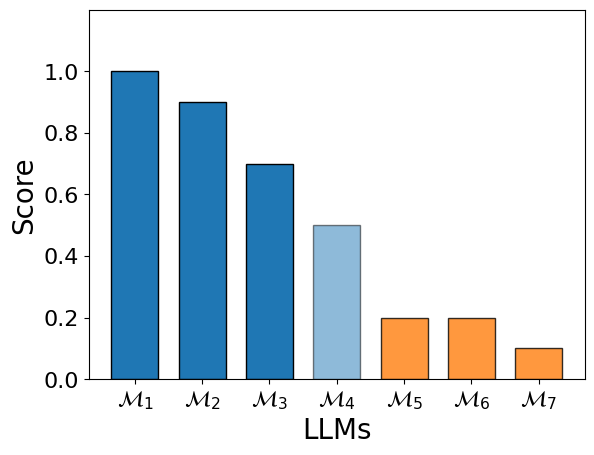

In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np
training_data = []
dataset_paths = ["../../datasets/split2_model7/gsm8k-train.json"]
for file_path in dataset_paths:
    with open(file_path, 'r') as f:
        data_list = json.load(f)
        training_data.extend(data_list)


# scores = np.array (list(training_data[219]['scores'].values()))
scores = np.array([1.0, 0.9, 0.7, 0.5,0.2,0.2, 0.1])
soft_max_score = np.exp(scores) / np.sum(np.exp(scores))

x = np.arange(7)

# plot_scores = [scores, soft_max_score]
plt.xlabel('LLMs', fontsize=20)
plt.xticks(np.array(range(7)), [r"$\mathcal{M}" + f"_{i+1}$" for i in range(7)], fontsize=16)
plt.ylabel('Score', fontsize=20)
plt.yticks(np.array(range(6))/5, fontsize=16)
plt.ylim(0, 1.2)
width = 0.7
scores = np.sort(scores)[::-1]
bars1 = plt.bar(x[3:-3], scores[3:-3], width=width, label='Scores', alpha=0.5, edgecolor='black',)
bars2 = plt.bar(x[:3], scores[:3], width=width, label='Scores', alpha=1, color=bars1[0].get_facecolor(),edgecolor='black',)
bars3 = plt.bar(x[-3:], scores[-3:], width=width, label='Scores',  alpha=0.8, edgecolor='black',)
# bars1[0].get_facecolor()
# color=bars1[0].get_facecolor(),

plt.savefig("/data/home/chensh/projects/LLM_router/figures/score_distribution.png", dpi=800, bbox_inches = 'tight')


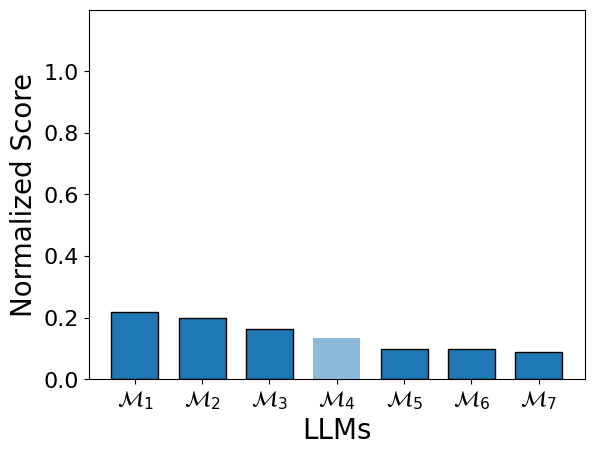

In [5]:

x = np.arange(7)

# plot_scores = [scores, soft_max_score]
plt.xlabel('LLMs', fontsize=20)
plt.xticks(np.array(range(7)), [r"$\mathcal{M}" + f"_{i+1}$" for i in range(7)], fontsize=16)
plt.ylabel('Normalized Score', fontsize=20)
plt.yticks(np.array(range(6))/5, fontsize=16)
plt.ylim(0, 1.2)
width = 0.7
soft_max_score = np.sort(soft_max_score)[::-1]
# plt.bar(x, soft_max_score, width=width, label='Softmax Scores')
bars1 = plt.bar(x[3:-3], soft_max_score[3:-3], width=width, label='Softmax Scores', alpha=0.5)
bars2 = plt.bar(x[:3], soft_max_score[:3], width=width, label='Softmax Scores', alpha=1, color=bars1[0].get_facecolor(),edgecolor='black',)
bars3 = plt.bar(x[-3:], soft_max_score[-3:], width=width, label='Softmax Scores', color=bars1[0].get_facecolor(), alpha=1, edgecolor='black',)
plt.savefig("/data/home/chensh/projects/LLM_router/figures/Softmax_distribution.png", dpi=800, bbox_inches = 'tight')


In [6]:
import json
import matplotlib.pyplot as plt
import numpy as np
training_data = []
dataset_paths = ["../../datasets/split2_model7/gsm8k-train.json"]
for file_path in dataset_paths:
    with open(file_path, 'r') as f:
        data_list = json.load(f)
        training_data.extend(data_list)


scores = np.array (list(training_data[16]['scores'].values()))
soft_max_score = np.exp(scores) / np.sum(np.exp(scores))

scores

candidate = []
for i in range(len(training_data)):
    scores = np.array (list(training_data[i]['scores'].values()))
    scores = np.sort(scores)[::-1]
    if np.sum(scores) > 1 and scores[-1] > 0 and scores[3] <= 0.5 and scores[3] > 0.3 and scores[2] > 0.5 and scores[-2] < 0.3:
        candidate.append([i , scores])
print(candidate)

[[20, array([1. , 1. , 1. , 0.5, 0.3, 0.2, 0.1])], [74, array([1. , 1. , 1. , 0.5, 0.4, 0.1, 0.1])], [146, array([1. , 0.9, 0.6, 0.4, 0.3, 0.2, 0.2])], [219, array([1. , 0.8, 0.7, 0.5, 0.3, 0.2, 0.1])], [223, array([1. , 0.9, 0.7, 0.4, 0.3, 0.2, 0.1])], [225, array([1. , 1. , 0.6, 0.5, 0.4, 0.1, 0.1])], [323, array([1. , 0.9, 0.8, 0.5, 0.2, 0.2, 0.1])], [412, array([0.6, 0.6, 0.6, 0.4, 0.1, 0.1, 0.1])], [444, array([1. , 1. , 0.9, 0.4, 0.3, 0.2, 0.1])], [513, array([1. , 1. , 0.6, 0.4, 0.1, 0.1, 0.1])], [648, array([1. , 0.7, 0.7, 0.4, 0.2, 0.1, 0.1])], [671, array([1. , 1. , 1. , 0.4, 0.1, 0.1, 0.1])], [709, array([1. , 0.8, 0.7, 0.5, 0.3, 0.1, 0.1])], [755, array([1. , 1. , 0.7, 0.5, 0.3, 0.2, 0.2])], [805, array([1. , 0.8, 0.7, 0.4, 0.2, 0.1, 0.1])], [836, array([1. , 1. , 0.9, 0.4, 0.2, 0.1, 0.1])], [856, array([1. , 1. , 0.7, 0.5, 0.4, 0.2, 0.1])], [886, array([1. , 1. , 0.6, 0.4, 0.3, 0.2, 0.1])], [949, array([1. , 1. , 1. , 0.4, 0.2, 0.2, 0.1])]]
